In [76]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


Pregunta 1: Utilice yfinance para extraer datos bursátiles

Restablezca el índice, guarde y visualice las cinco primeras filas del marco de datos tesla_data utilizando la función head. Suba una captura de pantalla de los resultados y el código del principio de la Pregunta 1 a los resultados de abajo.

In [78]:
import yfinance as yf

In [79]:
tesla = yf.Ticker("TSLA")

In [80]:
tesla_data = tesla.history(period="max")

In [81]:
tesla_data.reset_index(inplace=True)

In [82]:
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


Pregunta 2: Utilizar Webscraping para extraer datos de ingresos de Tesla

Muestre las cinco últimas filas del marco de datos tesla_revenue utilizando la función tail. Suba una captura de pantalla de los resultados.

In [84]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [85]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

In [86]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}

In [87]:
html_data = requests.get(url, headers=headers).text
soup = BeautifulSoup(html_data, "html.parser")

In [88]:
tables = soup.find_all('table')

In [89]:
for table in tables:
    if 'Tesla Quarterly Revenue' in table.find('th').text:
        tesla_revenue = pd.read_html(str(table))[0]
        break

C:\Users\elpri\AppData\Local\Temp\ipykernel_5696\186087170.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(table))[0]


In [90]:
print("Nombres de columnas disponibles:", tesla_revenue.columns.tolist())

Nombres de columnas disponibles: ['Tesla Quarterly Revenue (Millions of US $)', 'Tesla Quarterly Revenue (Millions of US $).1']


In [91]:
tesla_revenue = tesla_revenue.rename(columns={tesla_revenue.columns[0]: 'Date', tesla_revenue.columns[1]: 'Revenue'})

In [92]:
print("Tipo de datos de Revenue antes de limpieza:", tesla_revenue['Revenue'].dtype)

Tipo de datos de Revenue antes de limpieza: object


In [93]:
if tesla_revenue['Revenue'].dtype == 'object':
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',', '').str.replace('$', '')
    tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors='coerce')
tesla_revenue.dropna(inplace=True)

tesla_revenue.tail()

,Date,Revenue
57,2010-09-30,31.0
58,2010-06-30,28.0
59,2010-03-31,21.0
61,2009-09-30,46.0
62,2009-06-30,27.0


Pregunta 3: Utilice yfinance para extraer datos de existencias

Restablezca el índice, guarde y muestre las primeras cinco filas del marco de  datos gme_data mediante la  función head. Cargue una captura de pantalla de los resultados y el código desde el comienzo de la pregunta 1 hasta los resultados a continuación.

In [95]:
import yfinance as yf

In [96]:
gme = yf.Ticker("GME")

In [97]:
gme_data = gme.history(period="max")
gme_data = gme_data.reset_index()
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693349,1.603295,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


Pregunta 4: Utilice el webscraping para extraer datos de ingresos de GME

Muestre las últimas cinco filas de la trama de  datos gme_revenue utilizando la  función tail. Sube una captura de pantalla de los resultados.

In [99]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

In [121]:
html_data = requests.get(url, headers=headers).text
soup = BeautifulSoup(html_data, "html.parser")

In [123]:
tables = soup.find_all('table')

In [125]:
for table in tables:
    if 'GameStop Quarterly Revenue' in table.find('th').text:
        gme_revenue = pd.read_html(str(table))[0]
        break

C:\Users\elpri\AppData\Local\Temp\ipykernel_5696\1096964336.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(table))[0]


In [133]:
print("Nombres de columnas disponibles:", gme_revenue.columns.tolist())

Nombres de columnas disponibles: ['GameStop Quarterly Revenue (Millions of US $)', 'GameStop Quarterly Revenue (Millions of US $).1']


In [135]:
gme_revenue = gme_revenue.rename(columns={gme_revenue.columns[0]: 'Date', gme_revenue.columns[1]: 'Revenue'})
print("Tipo de datos de Revenue antes de limpieza:", gme_revenue['Revenue'].dtype)


Tipo de datos de Revenue antes de limpieza: object


In [139]:
if gme_revenue['Revenue'].dtype == 'object':
    gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',', '').str.replace('$', '')
    gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors='coerce')

In [141]:
gme_revenue.dropna(inplace=True)

In [143]:
gme_revenue.tail()

,Date,Revenue
59,2010-01-31,3524
60,2009-10-31,1835
61,2009-07-31,1739
62,2009-04-30,1981
63,2009-01-31,3492


Pregunta 5: Trazar el gráfico de acciones de Tesla

Utilice la  función make_graph para graficar los datos de acciones de Tesla, también proporcione un título para el gráfico.

Sube una captura de pantalla de los resultados.

In [146]:
import matplotlib.pyplot as plt

In [150]:
def make_graph(stock_data, stock_revenue, title):
    fig, ax = plt.subplots(figsize=(12, 6))
    
    ax.plot(stock_data['Date'], stock_data['Close'])
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Fecha', fontsize=12)
    ax.set_ylabel('Precio de cierre ($)', fontsize=12)
    ax.grid(True)
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    plt.show()

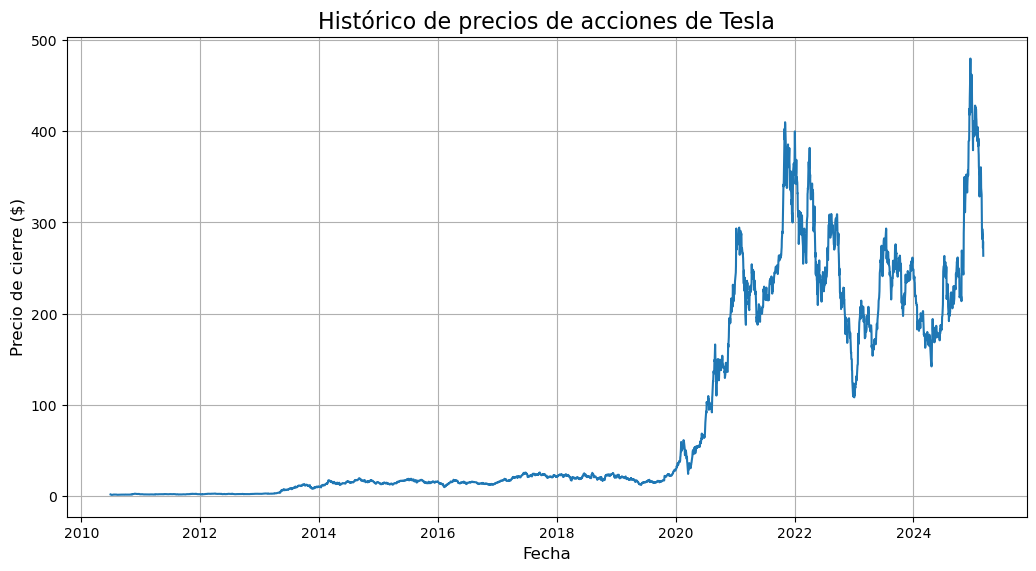

In [152]:
make_graph(tesla_data, tesla_revenue, 'Histórico de precios de acciones de Tesla')

Pregunta 6: Trazar el gráfico de acciones de GameStop

Utilice la  función make_graph para graficar los datos de acciones de GameStop, también proporcione un título para el gráfico.

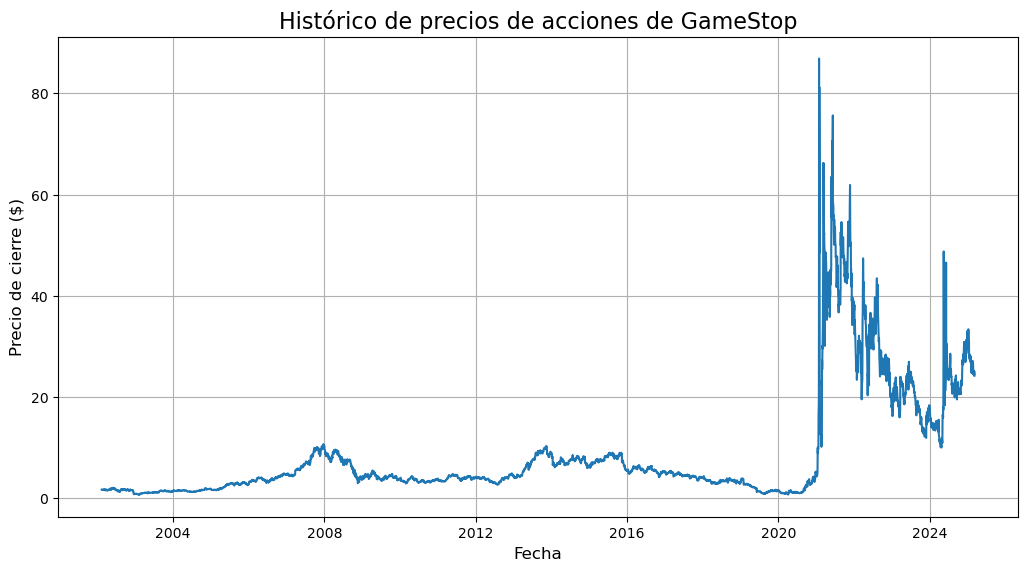

In [154]:
make_graph(gme_data, gme_revenue, 'Histórico de precios de acciones de GameStop')

*Título del proyecto: Proyecto Coursera Análisis de Datos                                    
Autor: Oscar León*